In [12]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib

In [13]:
#loading dataset
df = pd.read_csv('data.csv')

In [14]:
print("\nDataset shape:")
print(df.shape)


Dataset shape:
(500, 7)


In [15]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
    loan_id  annual_income  cibil_score  educated  employment_length  \
0  LOAN0001          86422          710         0                5.2   
1  LOAN0002          45795          805         1                8.6   
2  LOAN0003          30860          677         0                2.2   
3  LOAN0004          68158          567         0                6.0   
4  LOAN0005          92570          830         1                0.6   

   dti_ratio  approved  
0       0.44         1  
1       0.38         1  
2       0.47         0  
3       0.19         0  
4       0.22         1  


In [16]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       annual_income  cibil_score    educated  employment_length   dti_ratio  \
count     500.000000    500.00000  500.000000         500.000000  500.000000   
mean    62929.752000    698.41000    0.730000           7.745400    0.355680   
std     19761.644385     86.01504    0.444404           4.017876    0.139913   
min     30161.000000    550.00000    0.000000           0.500000    0.120000   
25%     45966.000000    624.00000    0.000000           4.200000    0.230000   
50%     63214.500000    699.00000    1.000000           8.000000    0.355000   
75%     80710.000000    773.50000    1.000000          11.100000    0.480000   
max     94987.000000    849.00000    1.000000          14.900000    0.600000   

         approved  
count  500.000000  
mean     0.812000  
std      0.391103  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


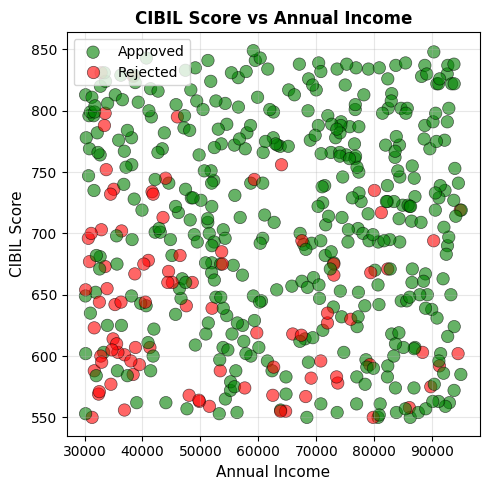

In [42]:
# Scatter Plot 
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='annual_income', y='cibil_score', 
                hue='approved',
                palette={0: 'red', 1: 'green'},
                s=80, alpha=0.6, edgecolor='black', linewidth=0.5)
plt.xlabel('Annual Income', fontsize=11)
plt.ylabel('CIBIL Score', fontsize=11)
plt.title('CIBIL Score vs Annual Income', fontsize=12, fontweight='bold')
plt.legend(title='', labels=['Approved', 'Rejected'], fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


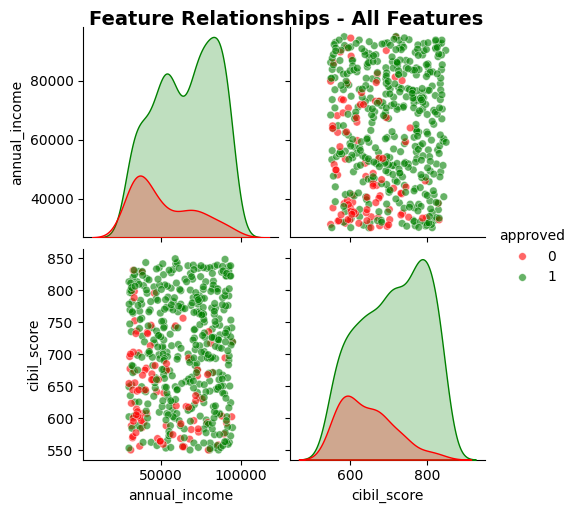

In [44]:
pairplot_df = df.drop(['loan_id', 'educated', 'employment_length', 'dti_ratio'], axis=1).copy()
, 
sns.pairplot(pairplot_df, 
             hue='approved',
             palette={0: 'red', 1: 'green'},
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 30})

plt.suptitle('Feature Relationships - All Features', fontsize=14, fontweight='bold', y=1.01)
plt.show()

In [19]:
# Separate Features and Target
X = df.drop(['loan_id', 'approved'], axis=1)  
y = df['approved']

In [20]:
print("\nFeatures:", list(X.columns))
print("Target:", y.name)


Features: ['annual_income', 'cibil_score', 'educated', 'employment_length', 'dti_ratio']
Target: approved


In [21]:
# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
print("\nScaled Feature Summary:")
print(df_scaled.describe().round(6))


Scaled Feature Summary:
       annual_income  cibil_score    educated  employment_length   dti_ratio
count     400.000000   400.000000  400.000000         400.000000  400.000000
mean        0.000000    -0.000000    0.000000           0.000000   -0.000000
std         1.001252     1.001252    1.001252           1.001252    1.001252
min        -1.652922    -1.722669   -1.644294          -1.808010   -1.618540
25%        -0.880621    -0.880812   -1.644294          -0.845212   -0.915896
50%         0.034667     0.037312    0.608164           0.080316   -0.002459
75%         0.889702     0.861569    0.608164           0.825708    0.910978
max         1.596589     1.785559    0.608164           1.769871    1.754150


In [24]:
# Train Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
# Model Coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_[0]:.4f}")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"  {feature:20s}: {coef:+.4f}")


Model Coefficients:
Intercept: 2.4440
  annual_income       : +1.0418
  cibil_score         : +1.2399
  educated            : +0.5693
  employment_length   : +0.8595
  dti_ratio           : -0.9876


In [26]:
# Feature Importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

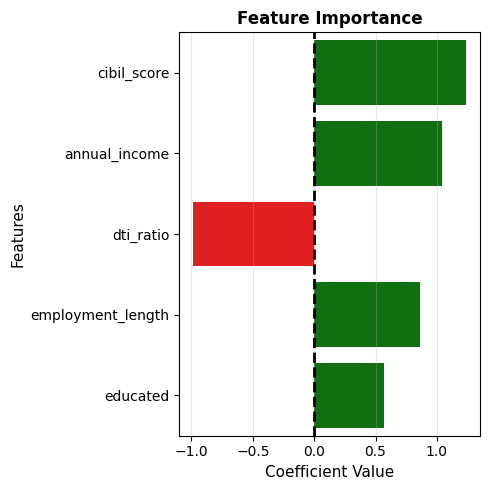

In [27]:
plt.figure(figsize=(5, 5))
colors = ['red' if x < 0 else 'green' for x in feature_importance['Coefficient']]
sns.barplot(data=feature_importance, y='Feature', x='Coefficient', 
            palette=colors, hue='Feature', legend=False)
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Coefficient Value', fontsize=11)
plt.ylabel('Features', fontsize=11)
plt.title('Feature Importance', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
# Make Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] 

In [29]:
# Probability DataFrame
prob_df = pd.DataFrame({
    'Probability': y_pred_proba,
    'Actual': ['Approved' if x == 1 else 'Rejected' for x in y_test]
})

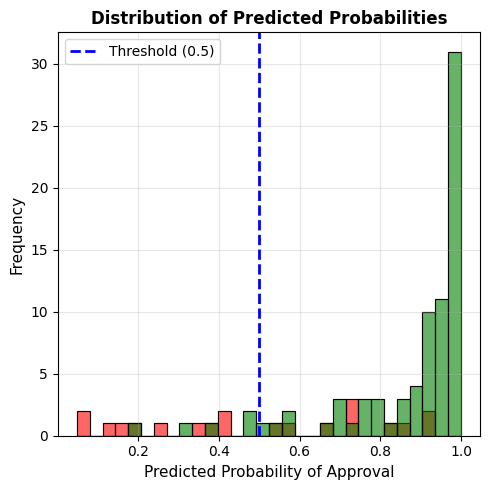

In [30]:
# Probability Distribution 
plt.figure(figsize=(5, 5))
sns.histplot(data=prob_df, x='Probability', hue='Actual', 
             bins=30, palette={'Rejected': 'red', 'Approved': 'green'}, 
             alpha=0.6, edgecolor='black')
plt.axvline(x=0.5, color='blue', linestyle='--', linewidth=2, label='Threshold (0.5)')
plt.xlabel('Predicted Probability of Approval', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of Predicted Probabilities', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [31]:
# Evaluate Model
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [32]:
print("\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Testing Accuracy:  {test_accuracy:.2%}")
print(f"Precision:         {precision:.2%}")
print(f"Recall:            {recall:.2%}")
print(f"F1-Score:          {f1:.2%}")


Model Performance:
Training Accuracy: 84.50%
Testing Accuracy:  84.00%
Precision:         88.10%
Recall:            92.50%
F1-Score:          90.24%


In [33]:
metrics_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [train_accuracy, test_accuracy, precision, recall, f1]
})

<Axes: xlabel='Metric', ylabel='Score'>

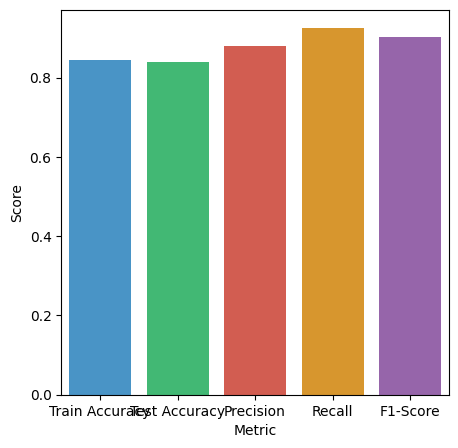

In [34]:
plt.figure(figsize=(5, 5))
colors_palette = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
sns.barplot(data=metrics_df, x='Metric', y='Score', palette=colors_palette, hue='Metric', legend=False)


In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[10 10]
 [ 6 74]]


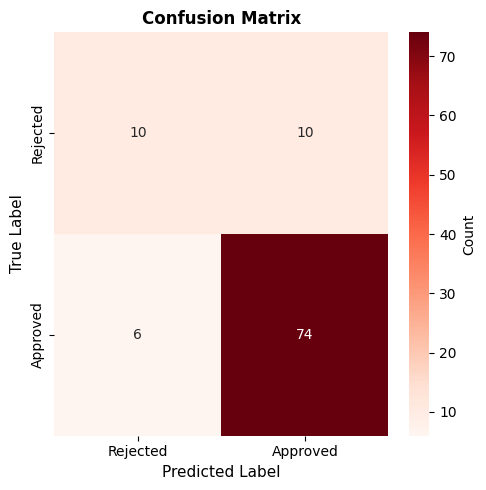

In [36]:
# Confusion Matrix 
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'],
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=11)
plt.ylabel('True Label', fontsize=11)
plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [37]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))


Classification Report:
              precision    recall  f1-score   support

    Rejected       0.62      0.50      0.56        20
    Approved       0.88      0.93      0.90        80

    accuracy                           0.84       100
   macro avg       0.75      0.71      0.73       100
weighted avg       0.83      0.84      0.83       100



In [59]:
demo_user = pd.DataFrame({
    'annual_income': [100000],
    'cibil_score': [600],
    'educated': [1],
    'employment_length': [5],
    'dti_ratio': [0.2],
})

demo_user_scaled = scaler.transform(demo_user)
demo_prediction_proba = model.predict_proba(demo_user_scaled)[:, 1][0]
print(f"\nPredicted Probability of Loan Approval for Demo User: {demo_prediction_proba:.2%}")


Predicted Probability of Loan Approval for Demo User: 97.72%
